<a href="https://colab.research.google.com/github/nksgbc/exchangerate/blob/main/TSA_(ARIMA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from math import sqrt
import seaborn as sns
sns.set()


In [28]:

df=pd.read_csv("/content/drive/MyDrive/summer project/Colab Notebooks/TSA - Sheet1.csv")
df.head()


,Date,Price,Open,High,Low,Chg%
0,"Jul 14, 2022",79.89,79.708,80.235,79.666,0.30%
1,"Jul 13, 2022",79.65,79.490,79.870,79.475,0.25%
2,"Jul 12, 2022",79.45,79.466,79.666,79.459,0.05%
3,"Jul 11, 2022",79.41,79.255,79.585,79.255,0.19%
4,"Jul 08, 2022",79.26,79.180,79.435,79.128,0.14%


In [29]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%b %d, %Y')
df.index = df['Date']
df = df.sort_index(ascending=True, axis=0)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3009 entries, 2011-01-03 to 2022-07-14
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3009 non-null   datetime64[ns]
 1   Price   3009 non-null   float64       
 2   Open    3009 non-null   float64       
 3   High    3009 non-null   float64       
 4   Low     3009 non-null   float64       
 5   Chg%    3009 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 164.6+ KB


In [31]:
#split into 80% train and 20% test data
usd_inr=df[["Date", "Price"]]
train_size=int(len(usd_inr)*0.8)
train_size

df_train = usd_inr.iloc[:train_size]
df_test = usd_inr.iloc[train_size:]

**Auto Regressive Moving average model**

In [32]:
df_train['returns']=df['Chg%']

In [33]:
df_train.head()

,Date,Price,returns
Date,,,
2011-01-03,2011-01-03,44.625,-0.20%
2011-01-04,2011-01-04,44.920,0.66%
2011-01-05,2011-01-05,45.325,0.90%
2011-01-06,2011-01-06,45.355,0.07%
2011-01-07,2011-01-07,45.355,0.00%


In [34]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

In [35]:
import warnings
warnings.filterwarnings("ignore")

# ARIMA(1,1,1)

In [36]:
model_ar_1_i_1_ma_1 = ARIMA(df_train.Price, order=(1,1,1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
results_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Price   No. Observations:                 2406
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -342.754
Method:                       css-mle   S.D. of innovations              0.279
Date:                Tue, 16 Aug 2022   AIC                            693.508
Time:                        16:57:39   BIC                            716.651
Sample:                    01-04-2011   HQIC                           701.926
                         - 03-24-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0132      0.006      2.242      0.025       0.002       0.025
ar.L1.D.Price    -0.3919      0.161     -2.428      0.015      -0.708      -0.075
ma.L1.D.Price     0.4402      0.157      2.808      0.005       0.133       0.747
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.5520           +0.0000j            2.5520            0.5000
MA.1           -2.2717           +0.0000j            2.2717            0.5000
-----------------------------------------------------------------------------
"""

Residuals of the ARIMA(1,1,1)

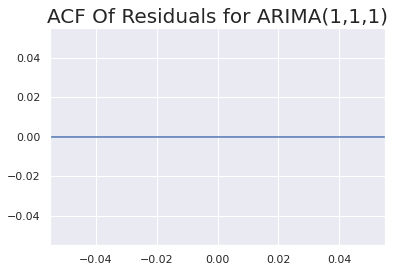

In [37]:
df_train['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid
sgt.plot_acf(df_train.res_ar_1_i_1_ma_1, zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(1,1,1)",size=20)
plt.show()
#failed to compute acf due to missing vaue

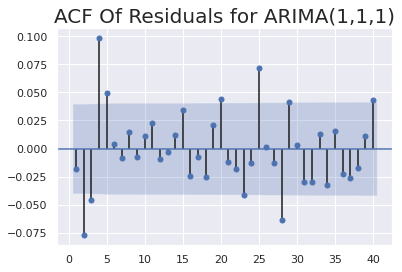

In [38]:
df_train['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid.iloc[:]
sgt.plot_acf(df_train.res_ar_1_i_1_ma_1[1:], zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(1,1,1)",size=20)
plt.show()

Higher lag ARIMA model

In [39]:
model_ar_1_i_1_ma_2 = ARIMA(df_train.Price, order=(1,1,2))
results_ar_1_i_1_ma_2 = model_ar_1_i_1_ma_2.fit()
model_ar_1_i_1_ma_3 = ARIMA(df_train.Price, order=(1,1,3))
results_ar_1_i_1_ma_3 = model_ar_1_i_1_ma_3.fit()
model_ar_2_i_1_ma_1 = ARIMA(df_train.Price, order=(2,1,1))
results_ar_2_i_1_ma_1 = model_ar_2_i_1_ma_1.fit()
model_ar_3_i_1_ma_1 = ARIMA(df_train.Price, order=(3,1,1))
results_ar_3_i_1_ma_1 = model_ar_3_i_1_ma_1.fit()
model_ar_3_i_1_ma_2 = ARIMA(df_train.Price, order=(3,1,2))
results_ar_3_i_1_ma_2 = model_ar_3_i_1_ma_2.fit(start_ar_lags=5)

In [40]:
print("ARIMA(1,1,1):  \t LL = ", results_ar_1_i_1_ma_1.llf, "\t AIC = ", results_ar_1_i_1_ma_1.aic)
print("ARIMA(1,1,2):  \t LL = ", results_ar_1_i_1_ma_2.llf, "\t AIC = ", results_ar_1_i_1_ma_2.aic)
print("ARIMA(1,1,3):  \t LL = ", results_ar_1_i_1_ma_3.llf, "\t AIC = ", results_ar_1_i_1_ma_3.aic)
print("ARIMA(2,1,1):  \t LL = ", results_ar_2_i_1_ma_1.llf, "\t AIC = ", results_ar_2_i_1_ma_1.aic)
print("ARIMA(3,1,1):  \t LL = ", results_ar_3_i_1_ma_1.llf, "\t AIC = ", results_ar_3_i_1_ma_1.aic)
print("ARIMA(3,1,2):  \t LL = ", results_ar_3_i_1_ma_2.llf, "\t AIC = ", results_ar_3_i_1_ma_2.aic)

ARIMA(1,1,1):  	 LL =  -342.75407974989776 	 AIC =  693.5081594997955
ARIMA(1,1,2):  	 LL =  -334.70075931977135 	 AIC =  679.4015186395427
ARIMA(1,1,3):  	 LL =  -330.6445498234043 	 AIC =  673.2890996468086
ARIMA(2,1,1):  	 LL =  -332.33277337814206 	 AIC =  674.6655467562841
ARIMA(3,1,1):  	 LL =  -328.35654679582876 	 AIC =  668.7130935916575
ARIMA(3,1,2):  	 LL =  -322.3795947755307 	 AIC =  658.7591895510614


In [41]:
print("\nLLR test p-value = " + str(LLR_test(results_ar_1_i_1_ma_2, results_ar_1_i_1_ma_3)))


LLR test p-value = 0.004


In [42]:
print("\nLLR test p-value = " + str(LLR_test(results_ar_1_i_1_ma_1, results_ar_1_i_1_ma_3)))


LLR test p-value = 0.0


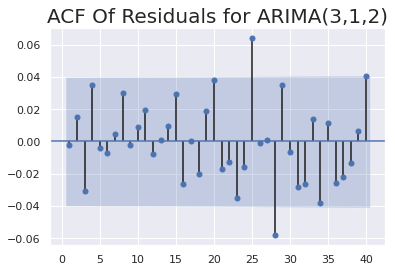

In [43]:
df_train['res_ar_3_i_1_ma_2'] = results_ar_3_i_1_ma_2.resid
sgt.plot_acf(df_train.res_ar_3_i_1_ma_2[1:], zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(3,1,2)", size=20)
plt.show()

In [44]:
results_ar_3_i_1_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Price   No. Observations:                 2406
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -322.380
Method:                       css-mle   S.D. of innovations              0.277
Date:                Tue, 16 Aug 2022   AIC                            658.759
Time:                        16:57:42   BIC                            699.259
Sample:                    01-04-2011   HQIC                           673.491
                         - 03-24-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0132      0.006      2.298      0.022       0.002       0.025
ar.L1.D.Price     1.0050      0.146      6.865      0.000       0.718       1.292
ar.L2.D.Price    -0.6332      0.098     -6.492      0.000      -0.824      -0.442
ar.L3.D.Price     0.1174      0.026      4.507      0.000       0.066       0.168
ma.L1.D.Price    -0.9801      0.147     -6.690      0.000      -1.267      -0.693
ma.L2.D.Price     0.5021      0.102      4.937      0.000       0.303       0.701
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8452           -1.2592j            1.5166           -0.1559
AR.2            0.8452           +1.2592j            1.5166            0.1559
AR.3            3.7033           -0.0000j            3.7033           -0.0000
MA.1            0.9759           -1.0193j            1.4112           -0.1285
MA.2            0.9759           +1.0193j            1.4112            0.1285
-----------------------------------------------------------------------------
"""

Models with Higher Levels of Integration

In [46]:
df_train['delta_prices']=df_train.Price.diff(1)

In [47]:
model_delta_ar_1_i_1_ma_1 = ARIMA(df_train.delta_prices[1:], order=(1,0,1))
results_delta_ar_1_i_1_ma_1 = model_delta_ar_1_i_1_ma_1.fit()
results_delta_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           delta_prices   No. Observations:                 2406
Model:                     ARMA(1, 1)   Log Likelihood                -342.754
Method:                       css-mle   S.D. of innovations              0.279
Date:                Tue, 16 Aug 2022   AIC                            693.508
Time:                        16:58:08   BIC                            716.651
Sample:                    01-04-2011   HQIC                           701.926
                         - 03-24-2020                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0132      0.006      2.242      0.025       0.002       0.025
ar.L1.delta_prices    -0.3919      0.161     -2.428      0.015      -0.708      -0.075
ma.L1.delta_prices     0.4402      0.157      2.808      0.005       0.133       0.747
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.5520           +0.0000j            2.5520            0.5000
MA.1           -2.2717           +0.0000j            2.2717            0.5000
-----------------------------------------------------------------------------
"""

In [49]:
sts.adfuller(df_train.delta_prices[1:])

(-20.380111305919723,
 0.0,
 4,
 2401,
 {'1%': -3.43307649105898,
  '5%': -2.8627445274375276,
  '10%': -2.567411220295375},
 656.251247862856)

Hence stationary

In [54]:
model_ar_1_i_2_ma_1 = ARIMA(df_train.Price, order=(1,2,1))
results_ar_1_i_2_ma_1 = model_ar_1_i_2_ma_1.fit(start_ar_lags=6)
results_ar_1_i_2_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.Price   No. Observations:                 2405
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -349.384
Method:                       css-mle   S.D. of innovations              0.279
Date:                Tue, 16 Aug 2022   AIC                            706.767
Time:                        17:00:59   BIC                            729.908
Sample:                    01-05-2011   HQIC                           715.185
                         - 03-24-2020                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2.933e-06   8.43e-06     -0.348      0.728   -1.94e-05    1.36e-05
ar.L1.D2.Price     0.0269      0.020      1.321      0.187      -0.013       0.067
ma.L1.D2.Price    -1.0000      0.001   -792.968      0.000      -1.002      -0.998
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           37.1361           +0.0000j           37.1361            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

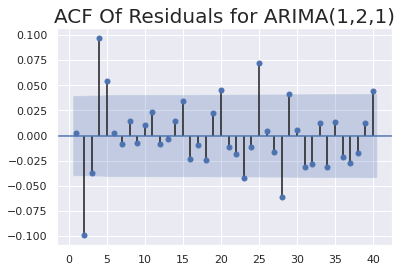

In [55]:
df_train['res_ar_1_i_2_ma_1'] = results_ar_1_i_2_ma_1.resid.iloc[:]
sgt.plot_acf(df_train.res_ar_1_i_2_ma_1[2:], zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(1,2,1)",size=20)
plt.show()

Fitting an Integrated model for stationary returns

Issues with using stationary data for ARIMA model


1.   More and more computationally expensive
2.   Transform the data 
3. Interpretation of result is difficult

